In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\krist\OneDrive\Desktop\CareerFoundry\Data Immersion\Achievement 4.2\21-01-25 Instacart Basket Analysis'

In [3]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'orders_products_merged_grouped.pkl'))

<Axes: xlabel='orders_day_of_week'>

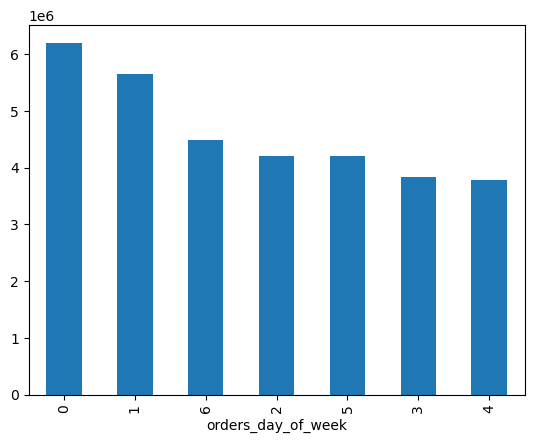

In [4]:
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

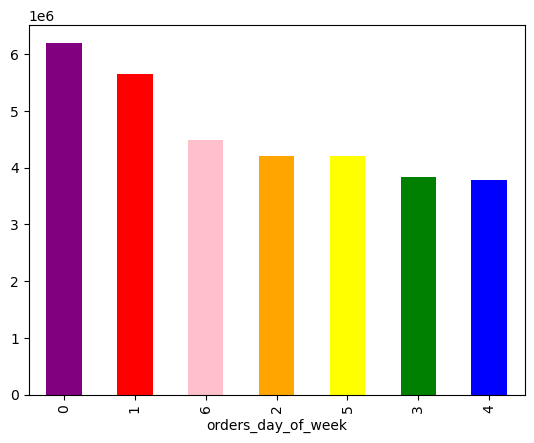

In [5]:
bar =df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Histogram

<Axes: ylabel='Frequency'>

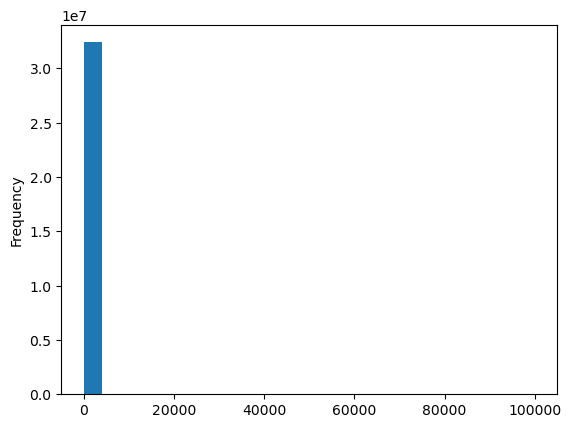

In [7]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [9]:
df_ords_prods_merge['prices'].mean()

11.980225638383445

In [10]:
df_ords_prods_merge['prices'].median()

7.4

In [11]:
df_ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

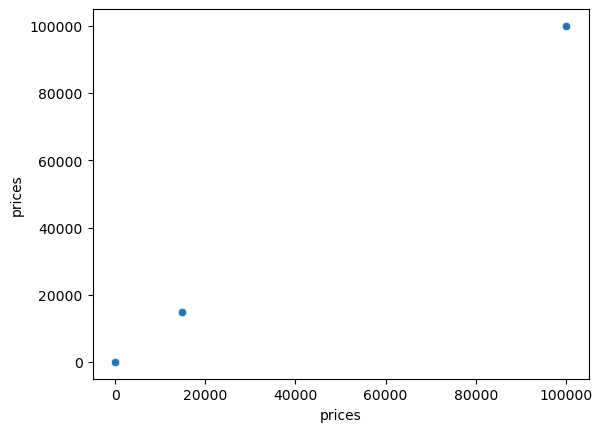

In [12]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)


In [13]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Regularly busy,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Regularly busy,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Least busy,Slowest days,Fewest orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range,Regularly busy,Regularly busy,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [14]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan


In [15]:
df_ords_prods_merge['prices'].max()

25.0

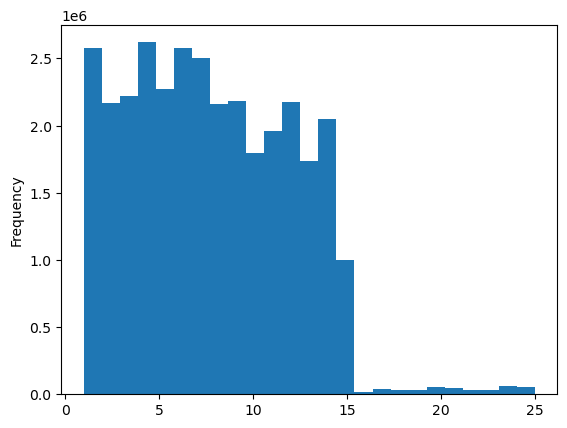

In [16]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

## Sampling Data

In [17]:
#Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merge[dev]

In [20]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merge[~dev]

In [21]:
len(small)

9721098

In [22]:
len(big)

22683761

In [23]:
len(big)+len(small)

32404859

In [24]:
df_2 = small[['orders_day_of_week','prices']]


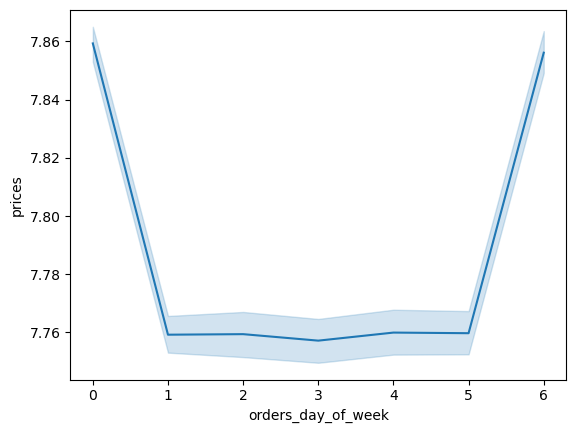

In [25]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')


In [27]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ords_dow.png'))